In [4]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Dataset Shape: (768, 9)

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome

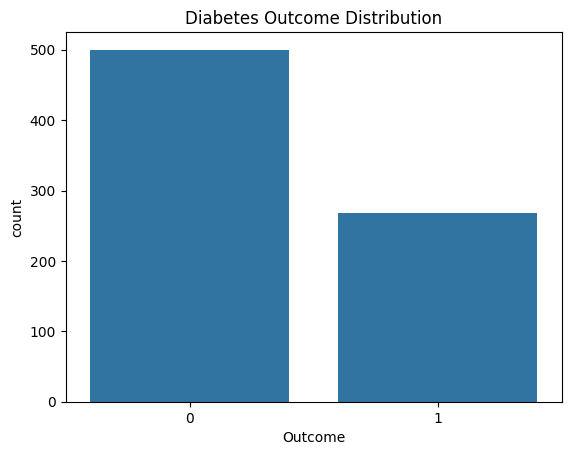

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Display shape and first few rows
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Check for null values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Class balance
print("\nTarget Class Distribution:")
print(df['Outcome'].value_counts())

# Visualize outcome distribution
sns.countplot(data=df, x='Outcome')
plt.title("Diabetes Outcome Distribution")
plt.show()


In [7]:
import pandas as pd

df = pd.read_csv("diabetes.csv")  # Make sure the file is in the same folder


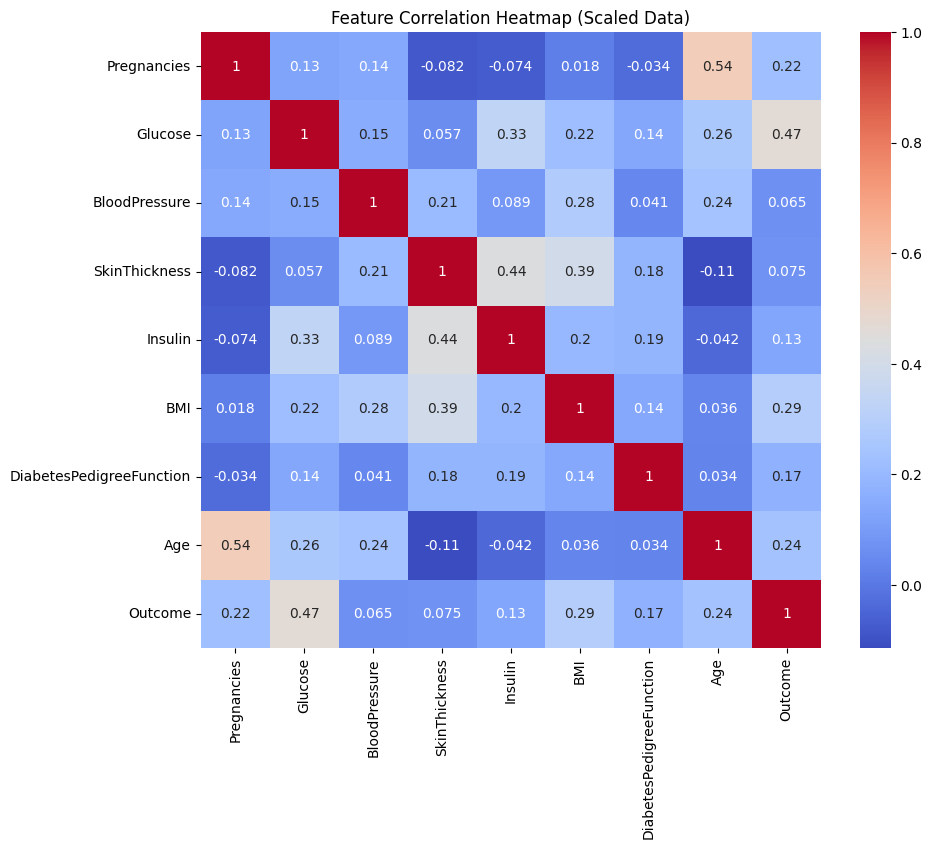

In [8]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the 'Outcome' column before scaling, then scale the rest
features = df.drop('Outcome', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert back to DataFrame for visualization
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Add Outcome column back
scaled_df['Outcome'] = df['Outcome']

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(scaled_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap (Scaled Data)')
plt.show()



In [13]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
features = df.drop('Outcome', axis=1)
target = df['Outcome']

# Apply standard scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert back to DataFrame for convenience
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df['Outcome'] = target.values  # add target back


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create target variable
target = df['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7207792207792207

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.79        99
           1       0.62      0.58      0.60        55

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154



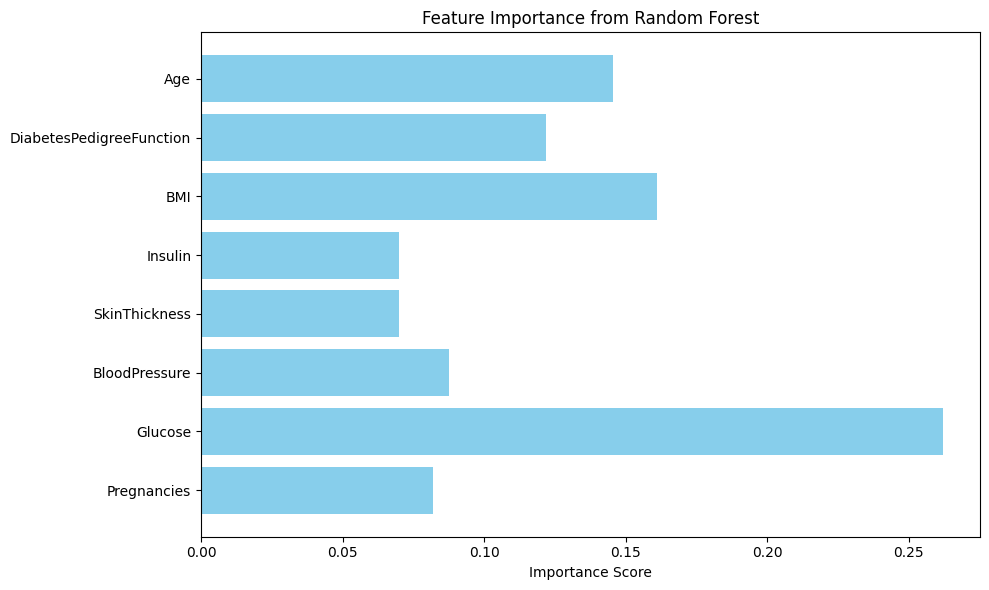

In [15]:
# Get feature importances from the model
importances = model.feature_importances_
feature_names = df.drop('Outcome', axis=1).columns

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()


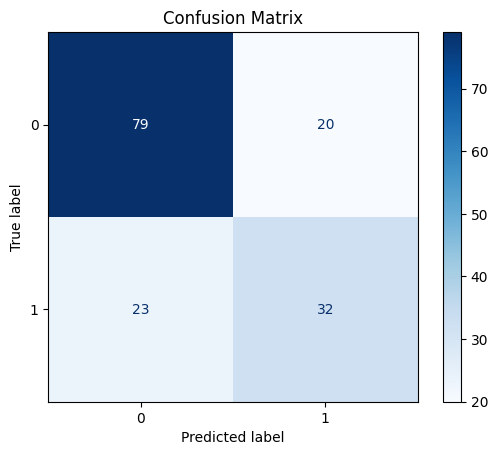

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
